<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/6.System-stability/Analise_estabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar e importas as bibliotecas necessárias


In [1]:
! pip install -qq control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 8.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import sympy as sp

# Exemplo: sistema de primeira ordem com tempo-morto
* também conhecido como FOPDT: "First Order Plus Dead Time".
* função de transferência: $ G_{OL}(s) = \frac{e^{0.123s}}{0.1s+1} $


In [3]:
# Aproximação do tempo-morto pode Padé 2/1
theta = 0.123
Gtd = ct. tf(*ct.pade(theta, 2, 1))
Gtd

TransferFunction(array([-16.2601626 , 396.58933175]), array([  1.        ,  32.5203252 , 396.58933175]))

In [12]:
# Função de transferência FOPDT: primeira ordem em série com tempo-morto
G = ct.tf(1,[0.1,1]) * Gtd
G

TransferFunction(array([-16.2601626 , 396.58933175]), array([1.00000000e-01, 4.25203252e+00, 7.21792584e+01, 3.96589332e+02]))

## *sisotool*

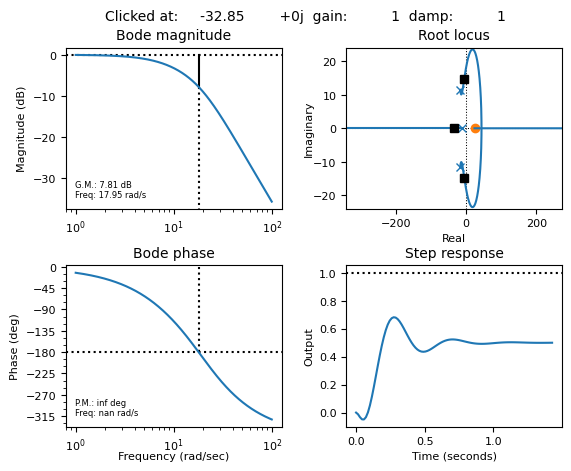

In [40]:
ct.sisotool(G)

## *Bode plot*

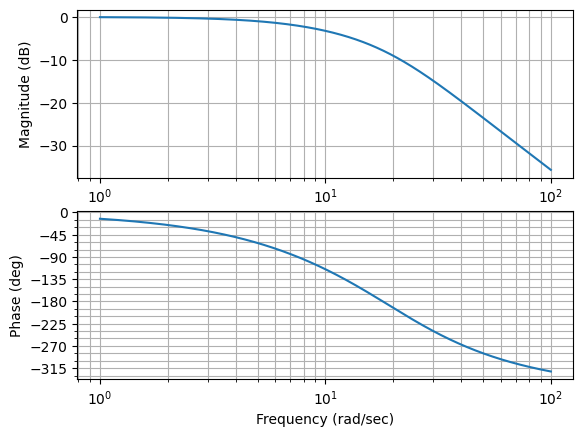

In [41]:
(mag, phase, omega) = ct.bode_plot(G)

## *root_locus*
Calcula o "lugar das raízes" encontrando as raízes de $1+G_{OL}(s) =0$, sendo $K_c$ modificado para encontrolar o valor das raízes.

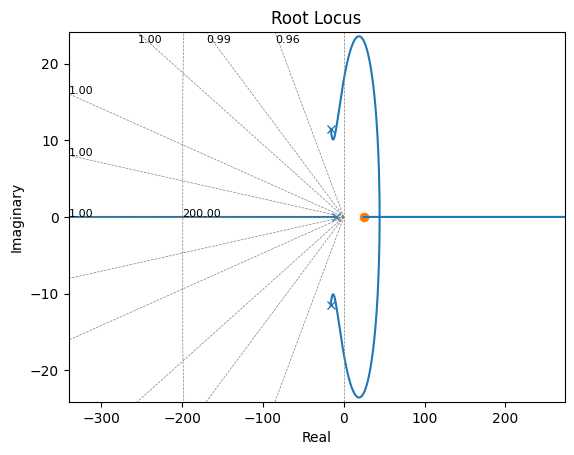

In [47]:
roots, gains = ct.rlocus(G)

## Margens de ganho e de fase

In [48]:
(gm, pm, wc, wg) = ct.margin(G)
print(f'Margem de ganho: {gm:1.2f}  wc: {wc:1.2f} rad/min')
print(f'Margem de fase: {pm:1.2f}  wg: {wg:1.2f} rad/min')

Margem de ganho: 2.46  wc: 17.95 rad/min
Margem de fase: inf  wg: nan rad/min


## Simulação da malha fechada

3 states have been removed from the model


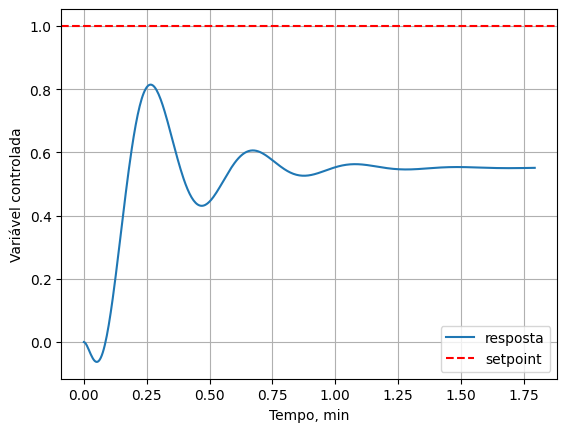

In [52]:
# Fechando a malha de controle
Kcm = gm
Kc = Kcm/2
Gol = Kc*ct.tf(1,[0.1,1]) * Gtd
G_servo = ct.minreal( Kc*G/(1 + Kc*G) )

# Teste servo
ts, ys = ct.step_response(G_servo)

# Visualizar
plt.plot(ts,ys, label = 'resposta')
plt.axhline(y=1,linestyle='--', color='r', label='setpoint')
plt.xlabel('Tempo, min')
plt.ylabel('Variável controlada')
plt.legend()
plt.grid()

# Exemplo de aplicação 1
Vamos encontrar $RA(\omega)$ e $\varphi(\omega)$ para resolver o problema usando método analítico e posteriormente comparar o valores de $\omega_c$, $RA(\omega_c)$ e $MG$ com os resultados fornecidos pela biblioteca *python-control*, considerando diferentes valores para tempo-morto $\theta$.

Considere o exemplo de uma malha de controle formada por:

* controlador: $ G_c = K_c$

* processo: $ G_p = \frac{2.5 }{(10s+1)(4s+1)}$

* medidor: $  G_m = \frac{e^{-\theta s}}{2s+1}$

Expressões a serem utilizadas:
* Razão de amplitude
$RA(\omega)  = $

* Atraso de fase:
$\varphi(\omega) =  $

Para determinar $\omega_c$, deve-se procurar o valor de frequência na qual $\varphi(\omega)=-\pi.$

### Solução analítica

In [ ]:
from scipy.optimize import fsolve

### Solução via biblioteca *python-control*




### Simulação da malha fechada
considerando teste servo com degrau unitário, $K_c = 0.5K_{cm}$ e $\theta=2$.

# Exemplo de aplicação 2

Considere agora que a malha de controle deve conter um controlador PI, tal que:

* controlador: $ G_c = K_c \bigg( 1+ \frac{1}{\tau_I s}\bigg)$

* processo: $ G_p = \frac{2.5 }{(10s+1)(4s+1)}$

* medidor: $  G_m = \frac{e^{-\theta s}}{2s+1}$